# Student Performance Indicator


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [11]:
numeric_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype!='O']

In [12]:
numeric_feature

['math_score', 'reading_score', 'writing_score']

In [13]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']

In [14]:
df['average']=df['total score']/3

In [15]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [16]:
df[df['math_score']==100]['average'].count()

7

# Exploring Data ( Visualization )

<AxesSubplot:xlabel='average', ylabel='Count'>

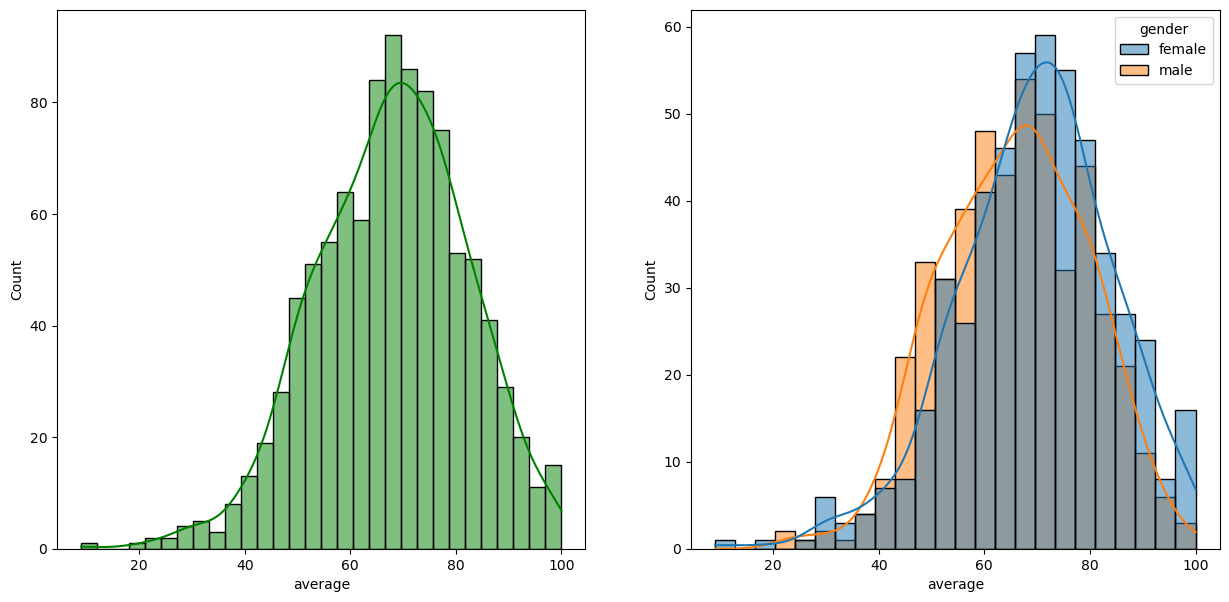

In [17]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df['average'],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')

<AxesSubplot:xlabel='total score', ylabel='Count'>

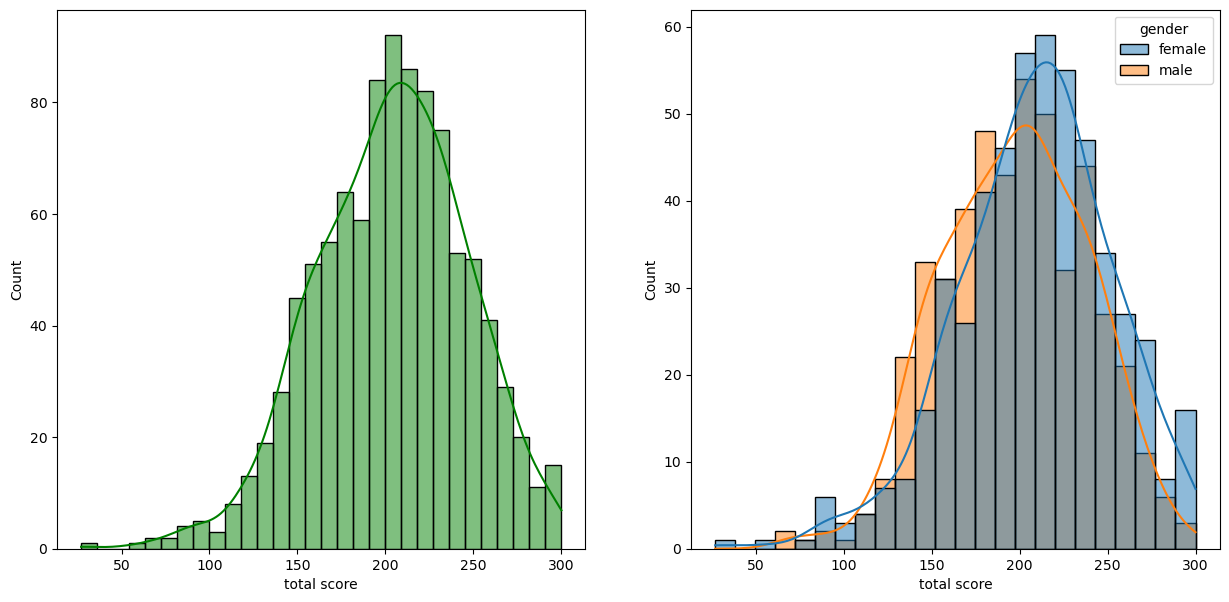

In [18]:
fig,axes=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(df['total score'],bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')

<AxesSubplot:xlabel='average', ylabel='Count'>

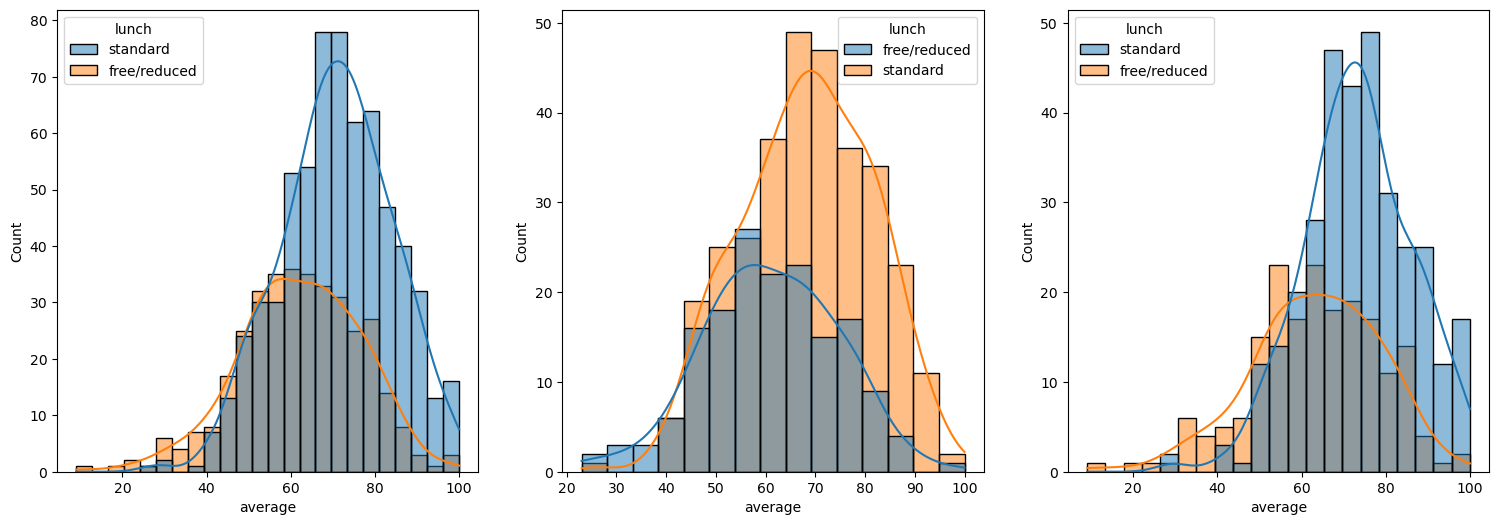

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',hue='lunch',kde=True)
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='lunch',kde=True)

<AxesSubplot:xlabel='average', ylabel='Count'>

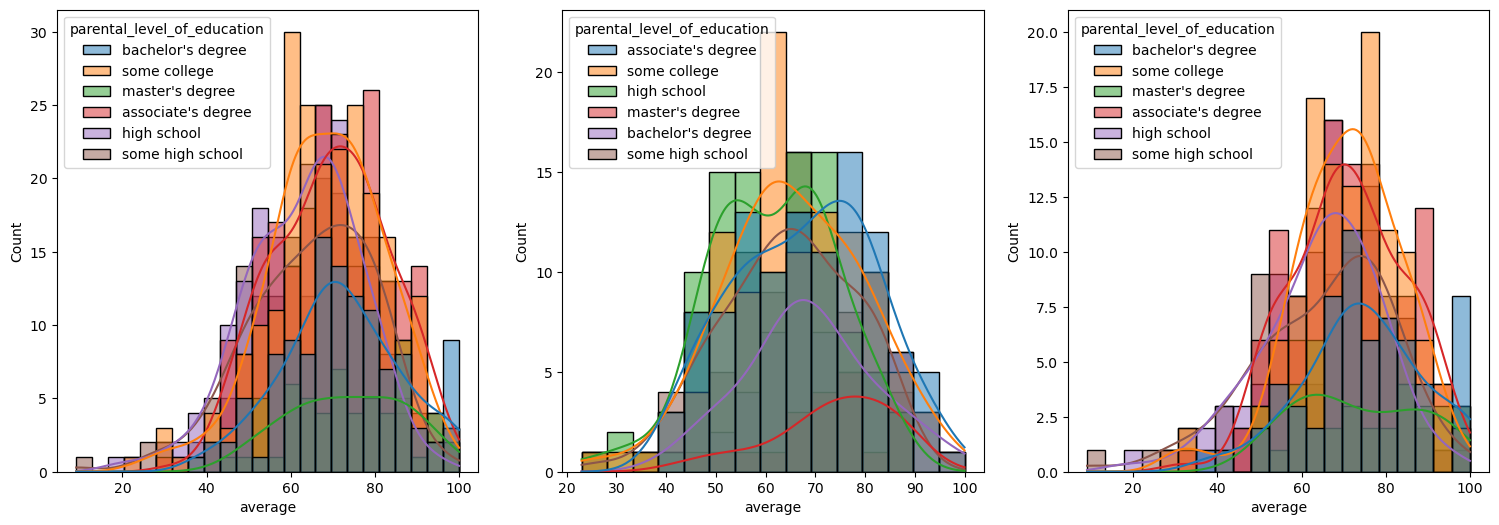

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',hue='parental_level_of_education',kde=True)
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='parental_level_of_education',kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='parental_level_of_education',kde=True)

<AxesSubplot:xlabel='average', ylabel='Count'>

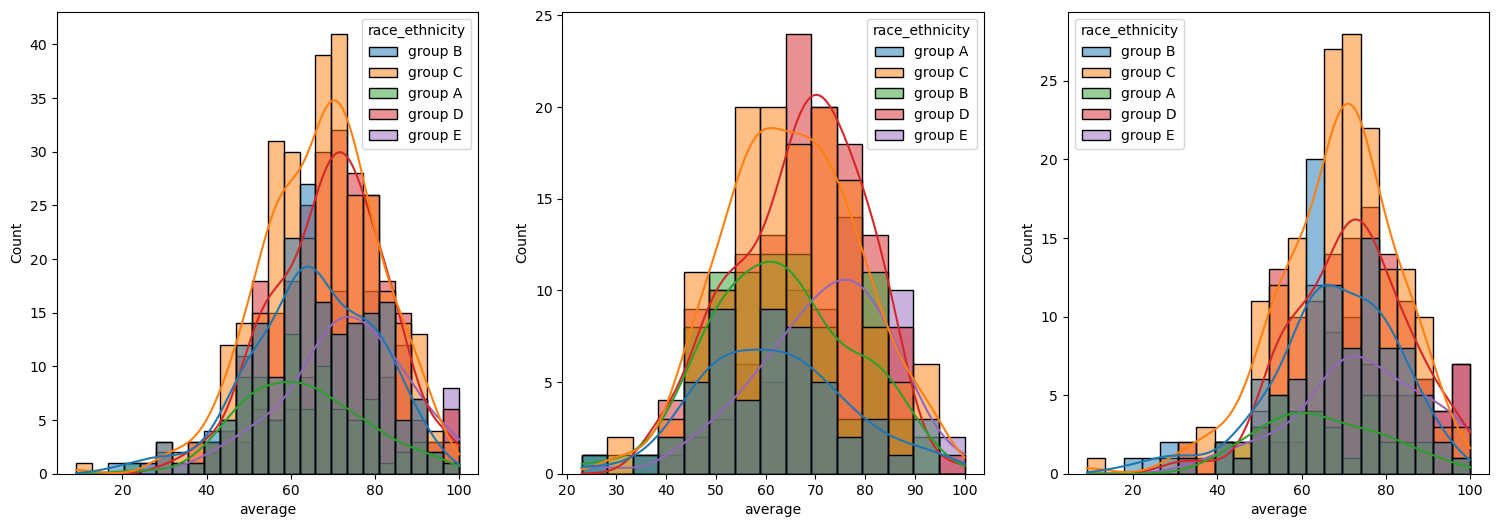

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',hue='race_ethnicity',kde=True)
plt.subplot(142)
sns.histplot(data=df[df['gender']=='male'],x='average',hue='race_ethnicity',kde=True)
plt.subplot(143)
sns.histplot(data=df[df['gender']=='female'],x='average',hue='race_ethnicity',kde=True)

# Maximumum score of students in all three subject

<AxesSubplot:title={'center':'writing score'}, ylabel='writing_score'>

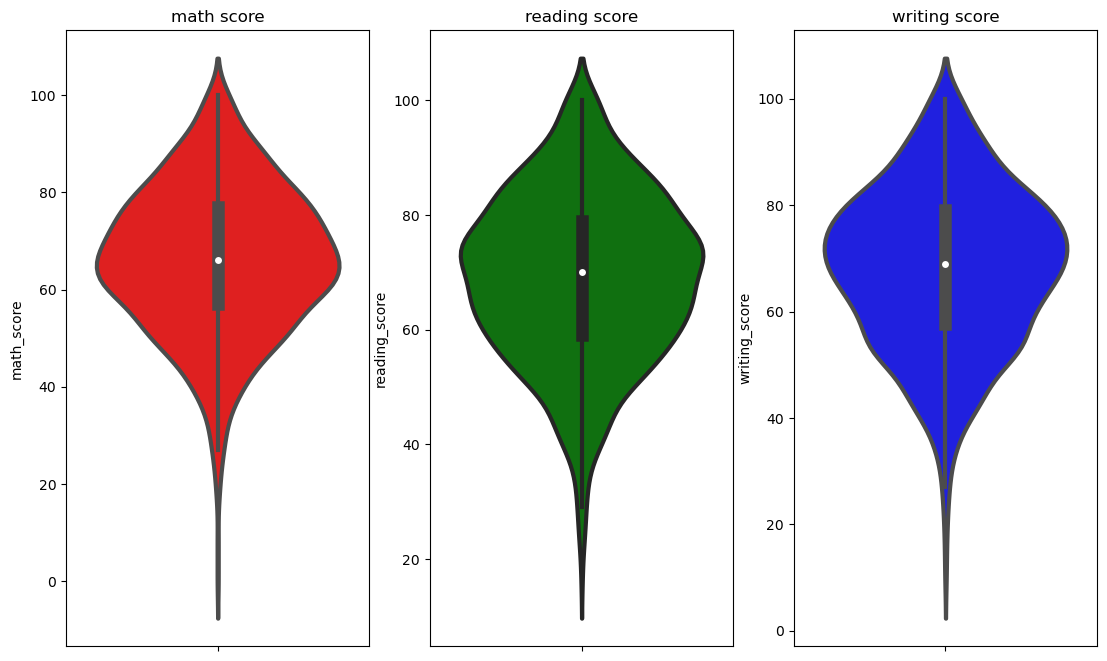

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('math score')
sns.violinplot(data=df,y='math_score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('reading score')
sns.violinplot(data=df,y='reading_score',color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('writing score')
sns.violinplot(data=df,y='writing_score',color='blue',linewidth=3)

# Multivariate analysis using pieplot

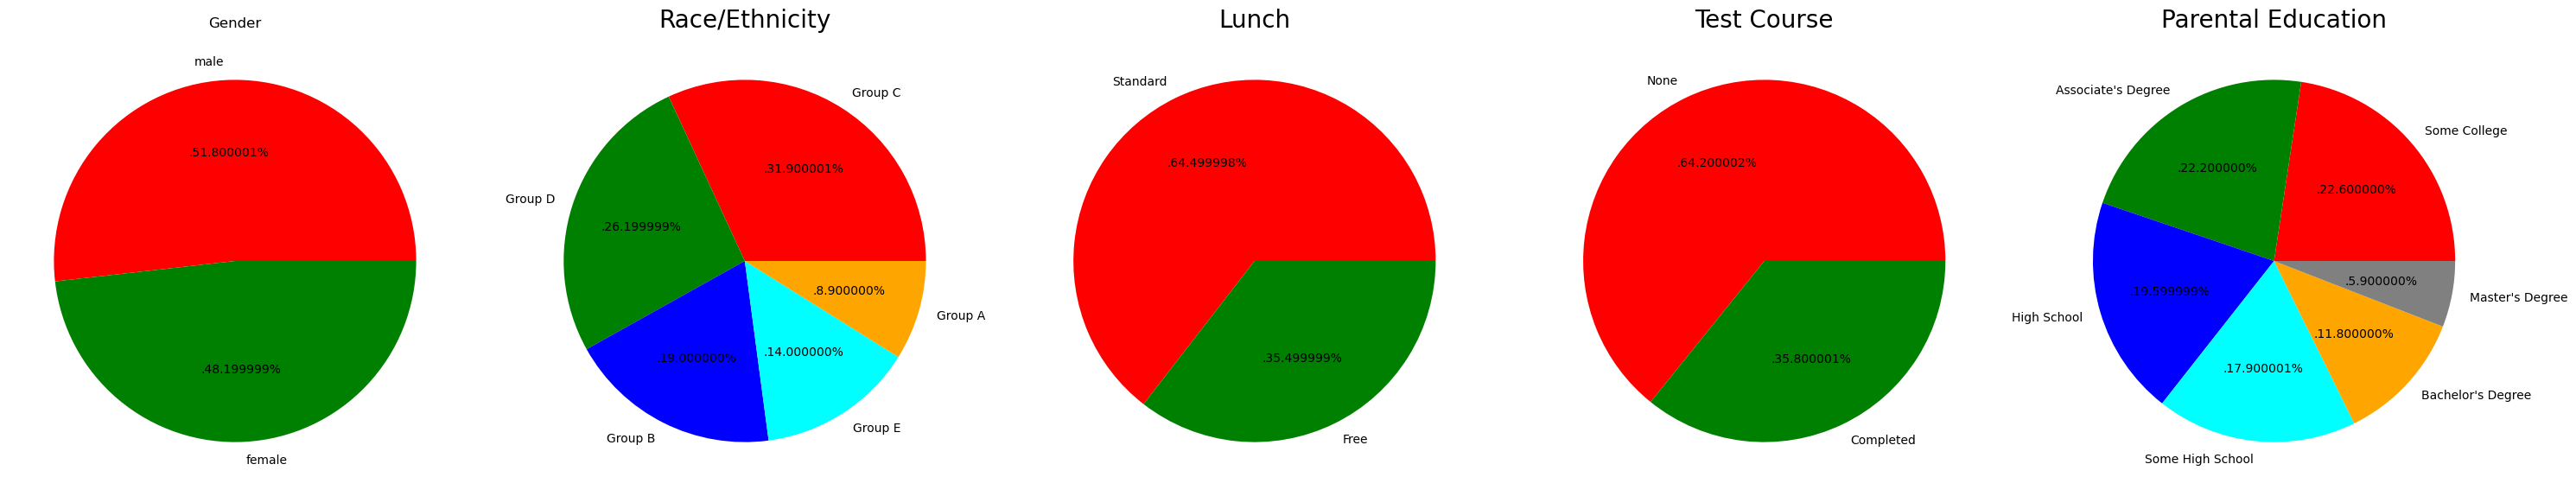

In [23]:
plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='male','female'
color=['red','green']

plt.pie(size,colors=color,labels=labels,autopct = '.%2f%%')
plt.title('Gender')
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Feature Wise Visualization

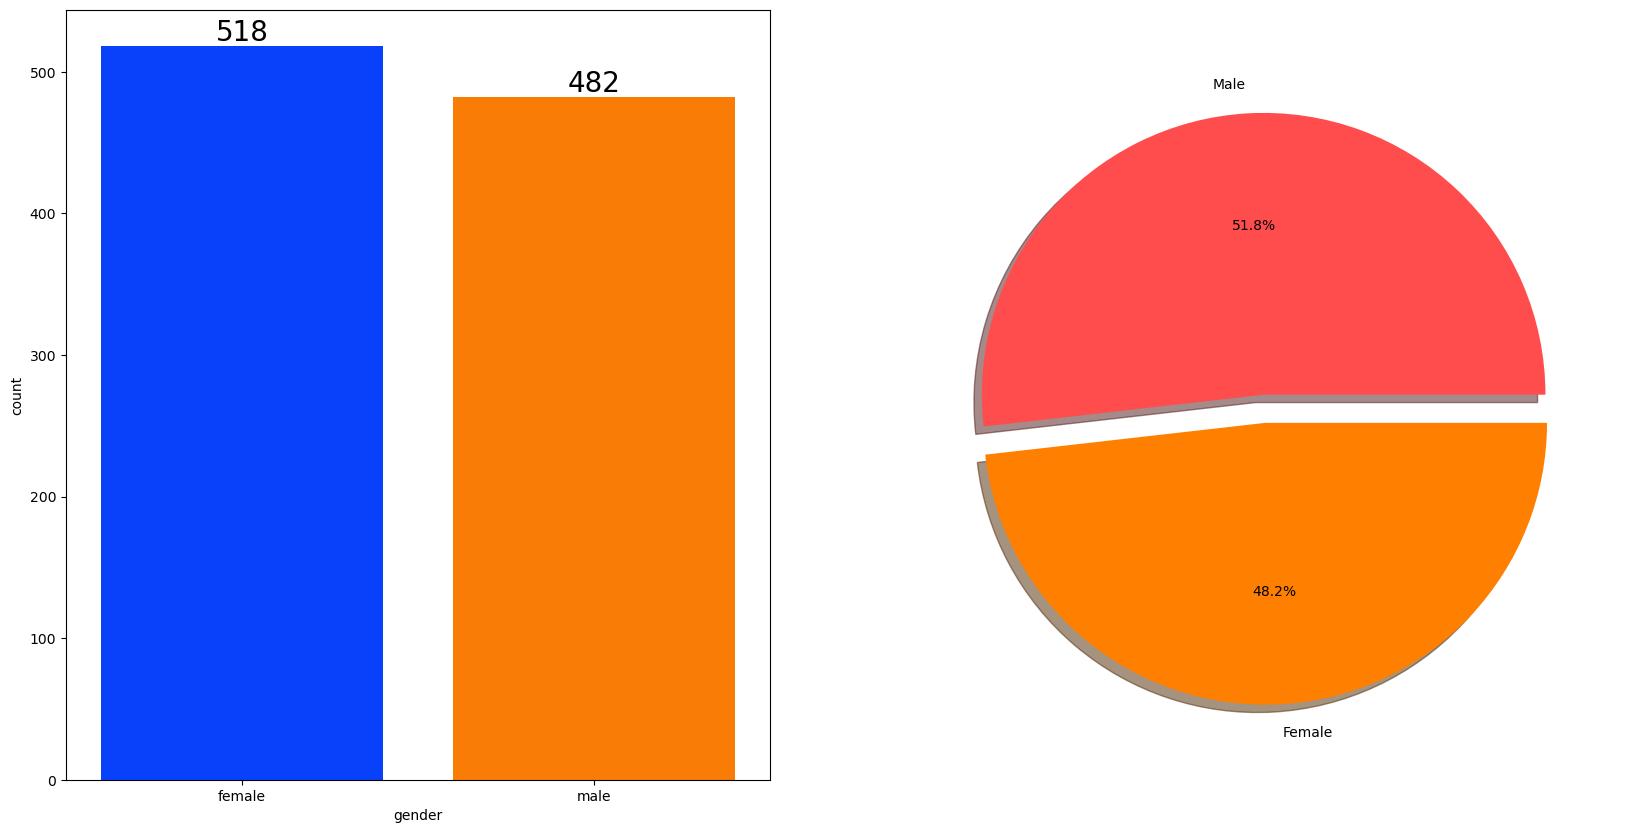

In [24]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance?)

In [25]:
gender_group=df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


In [26]:
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

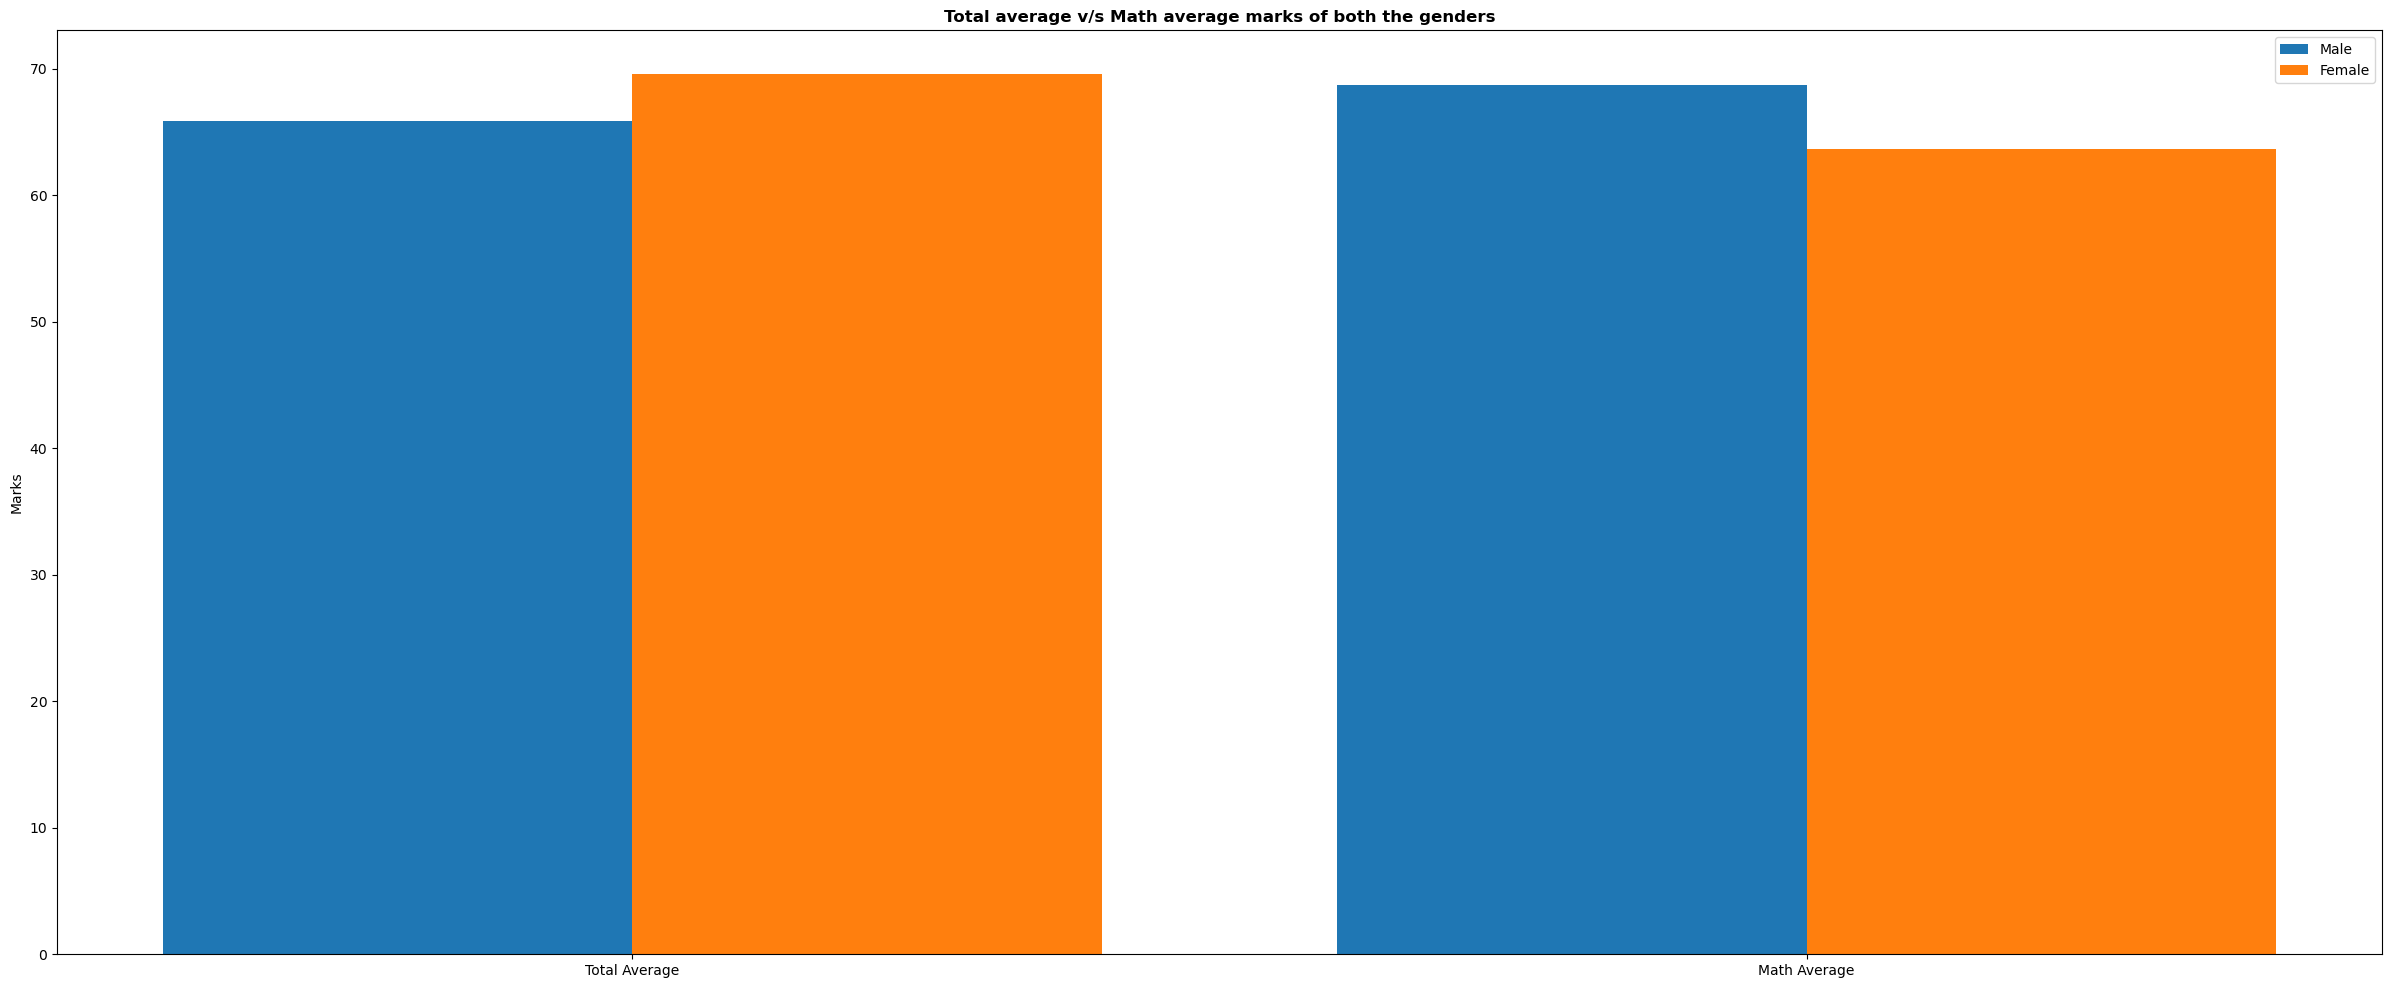

In [27]:
X = ['Total Average','Math Average']
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# Insights
On an average females have a better overall score than men.
whereas males have scored higher in Maths.

# RACE/EHNICITY COLUMN
How is Group wise distribution ?
Is Race/Ehnicity has any impact on student's performance ?
univariate analysis

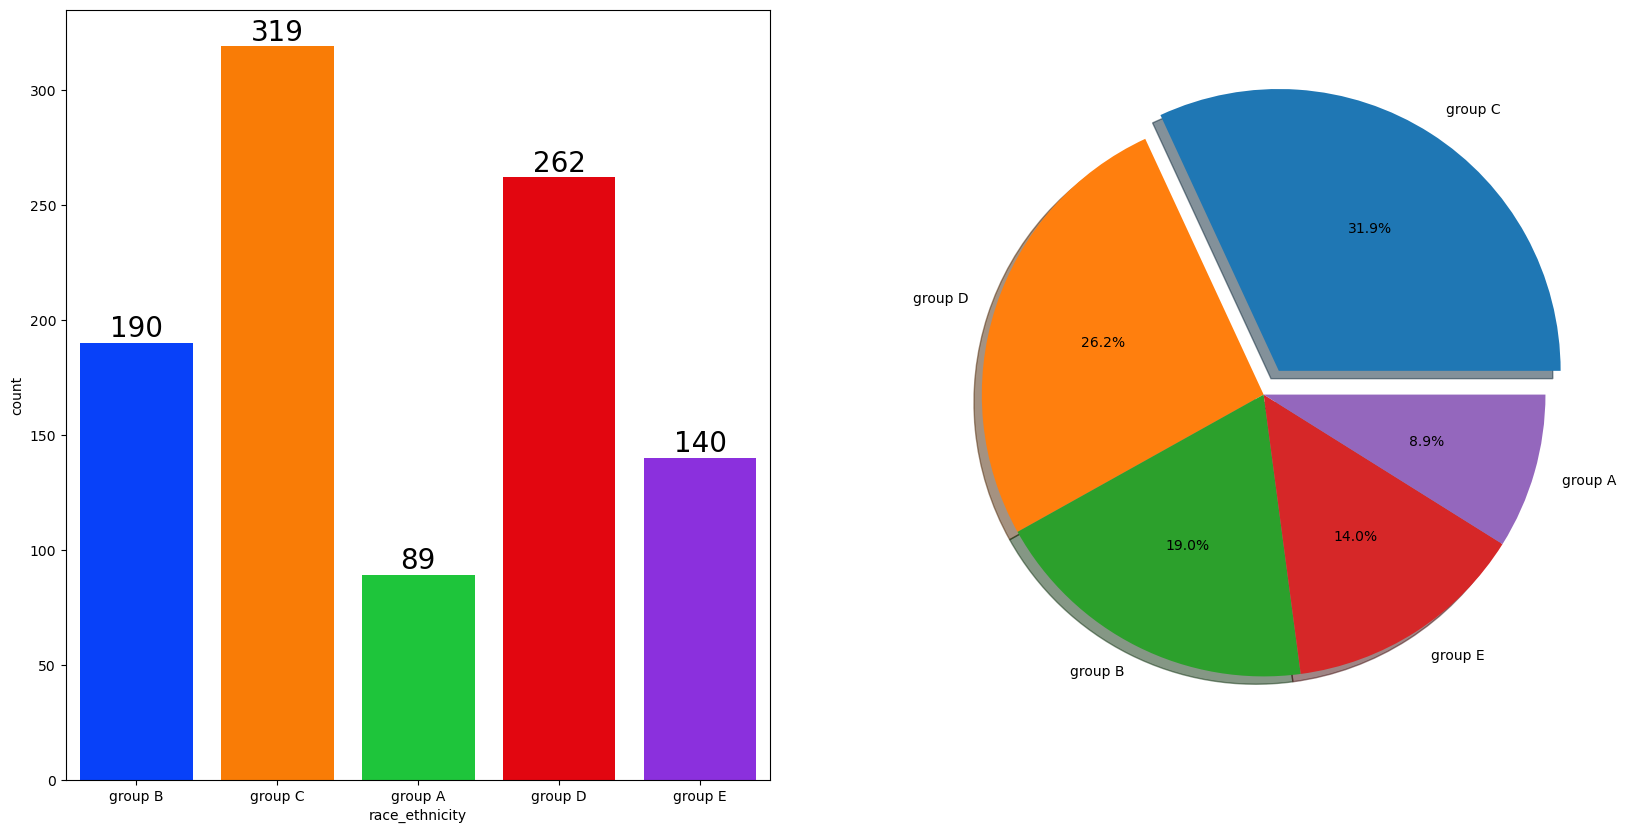

In [28]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

# Insights
Most of the student belonging from group C /group D.
Lowest number of students belong to groupA.

# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

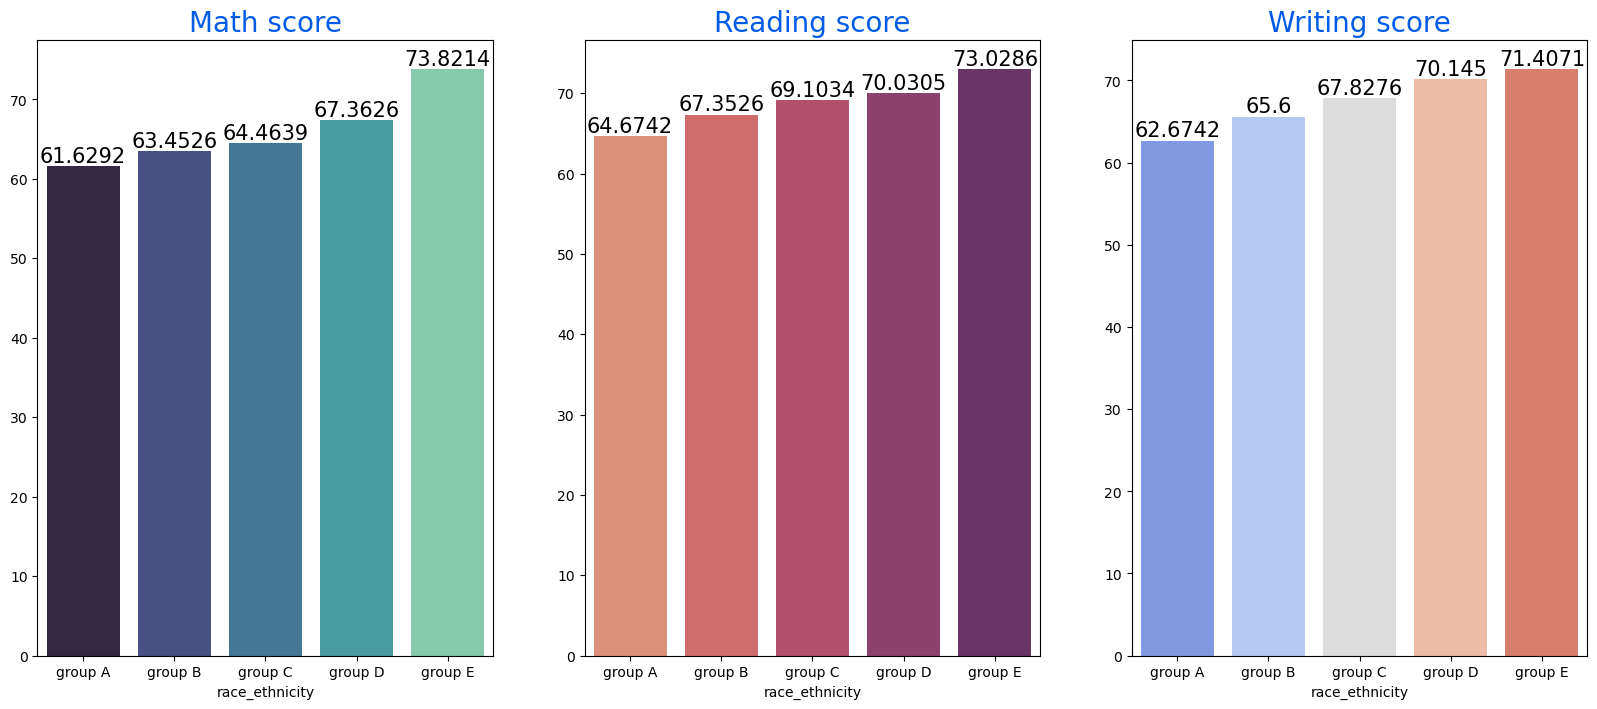

In [29]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


# PARENTAL LEVEL OF EDUCATION COLUMN
What is educational background of student's parent ?
Is parental education has any impact on student's performance ?

# UNIVARIATE ANALYSIS ( What is educational background of student's parent?)

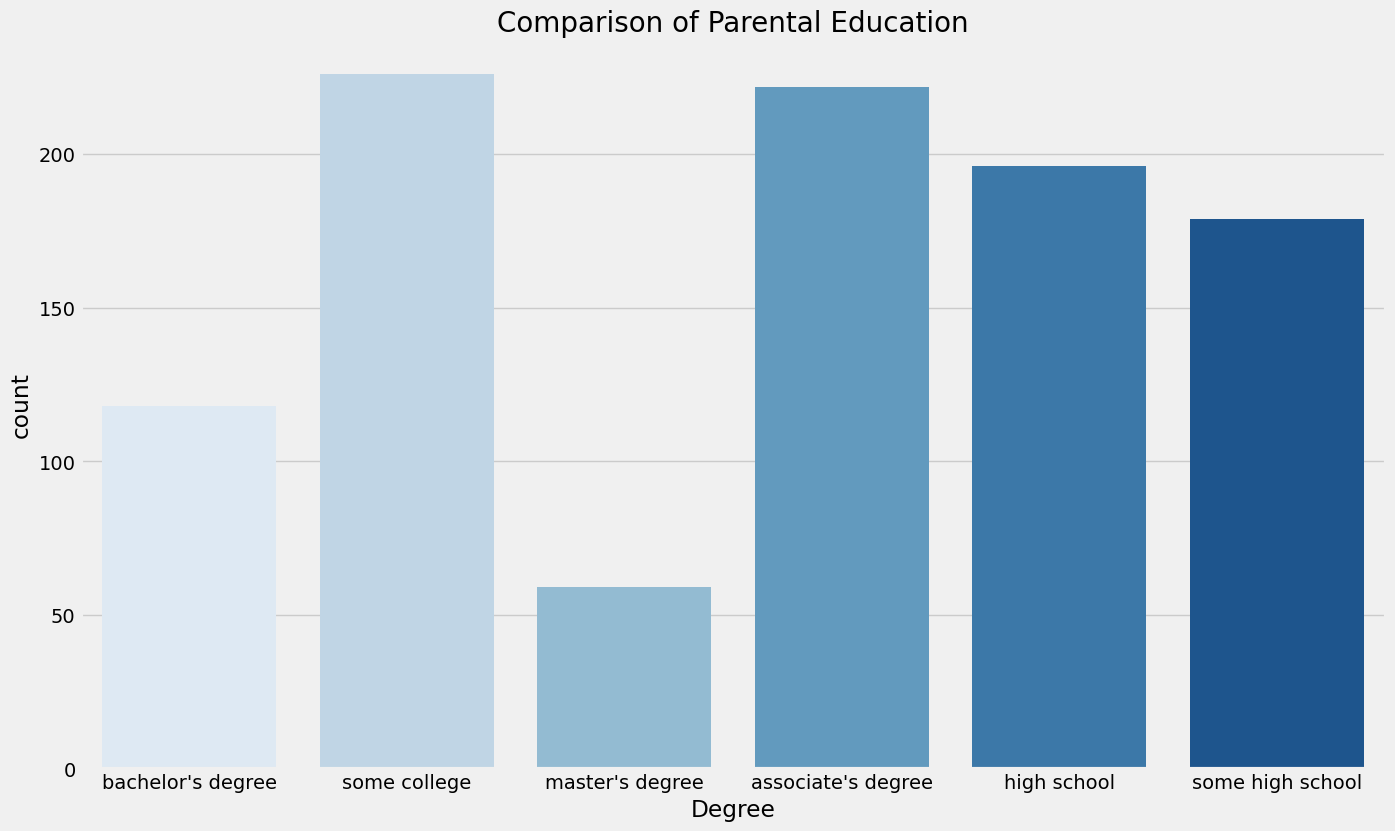

In [30]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

# BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

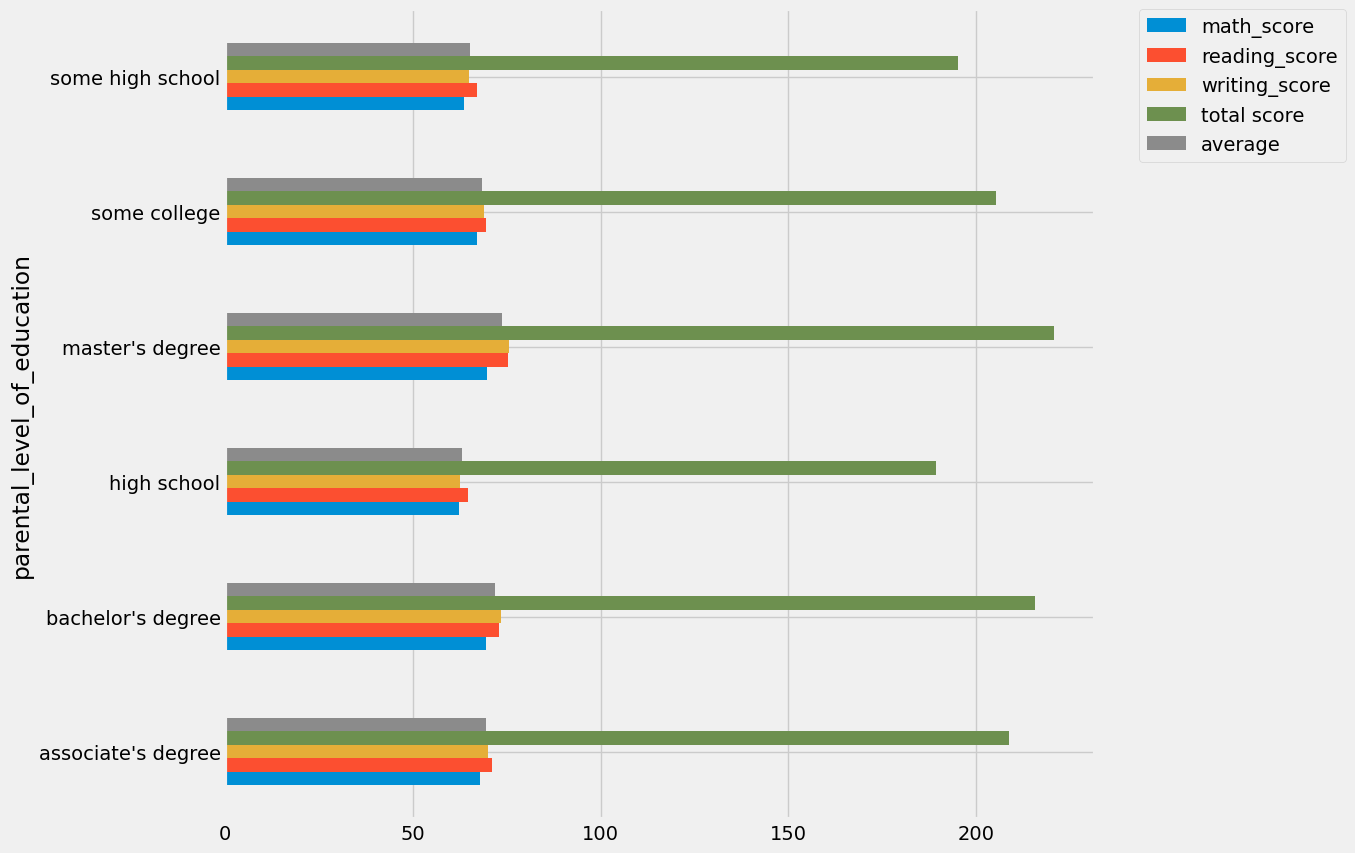

In [82]:
df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 4.4.4 LUNCH COLUMN
Which type of lunch is most common amoung students ?
What is the effect of lunch type on test results?

# UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

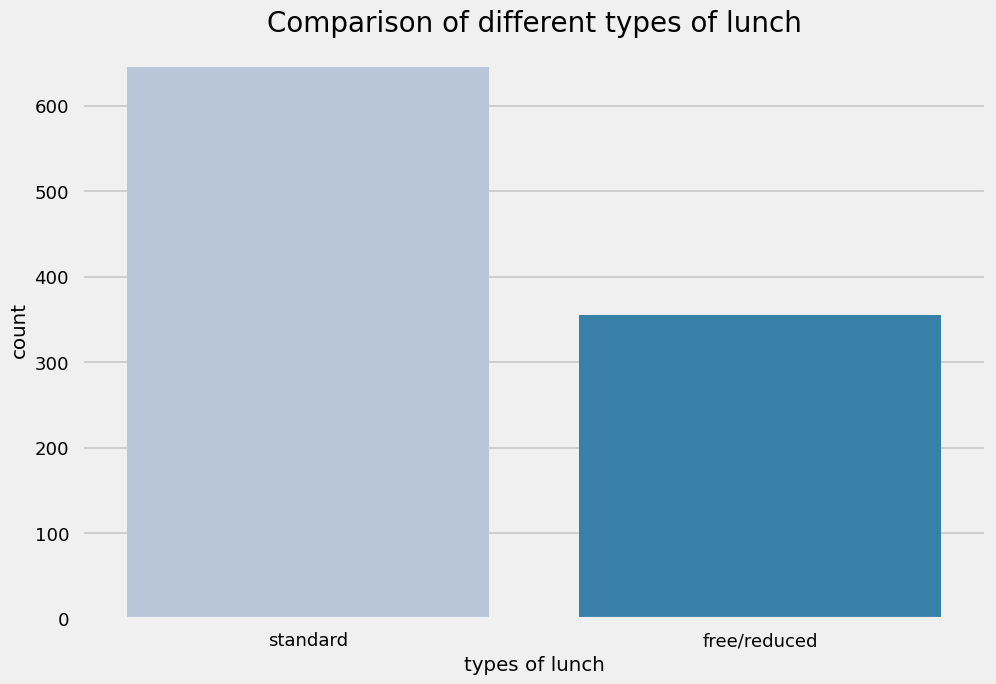

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

# BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

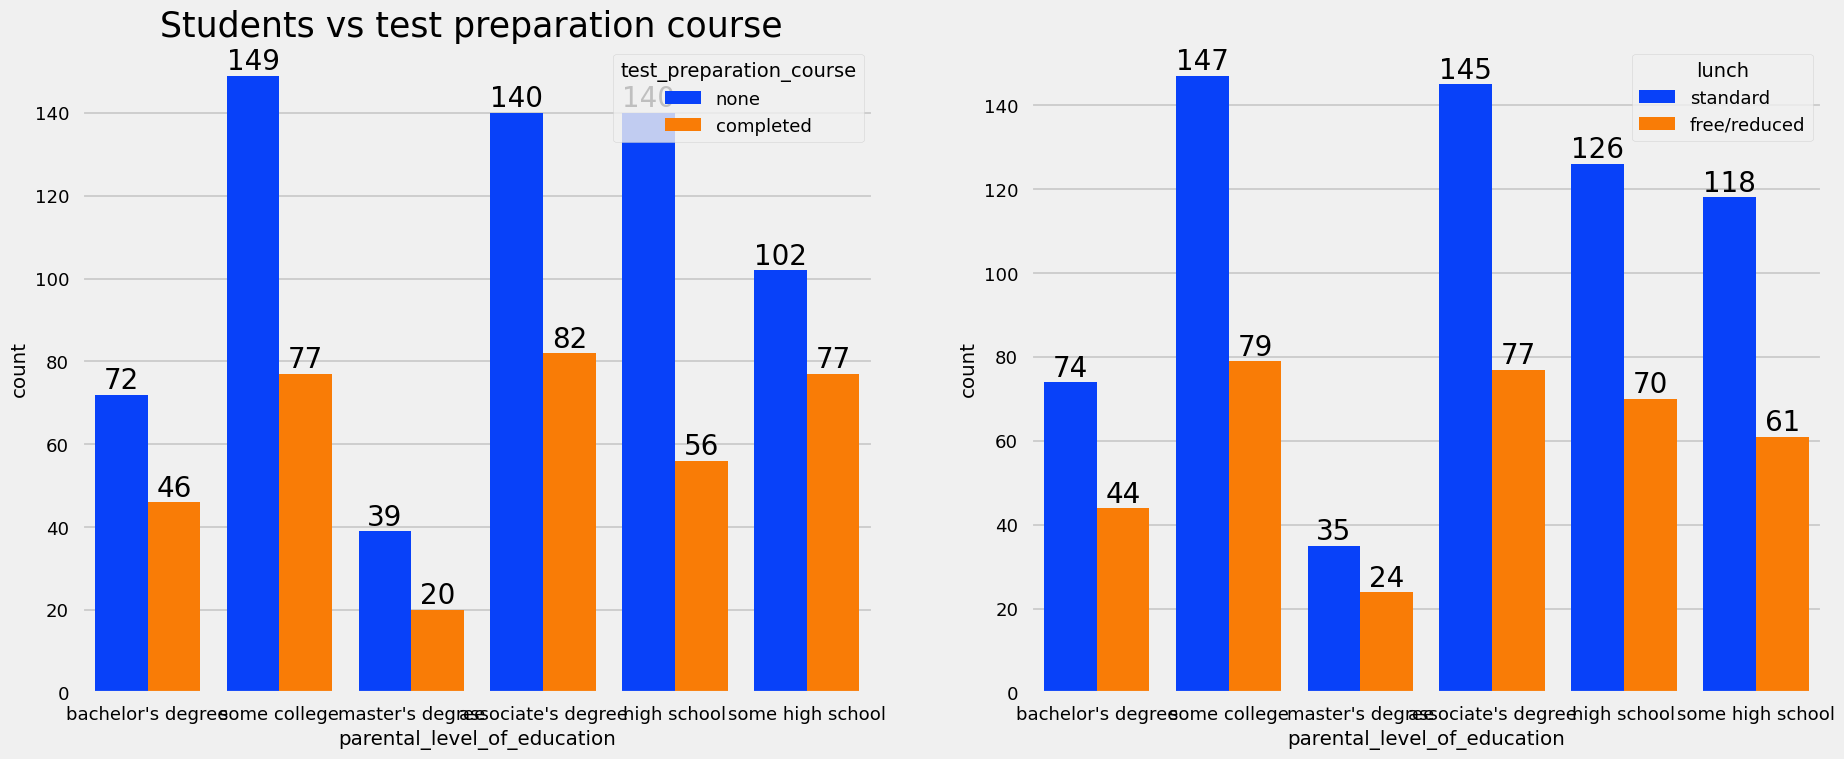

In [37]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

# TEST PREPARATION COURSE COLUMN
Which type of lunch is most common amoung students ?
Is Test prepration course has any impact on student's performance ?

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

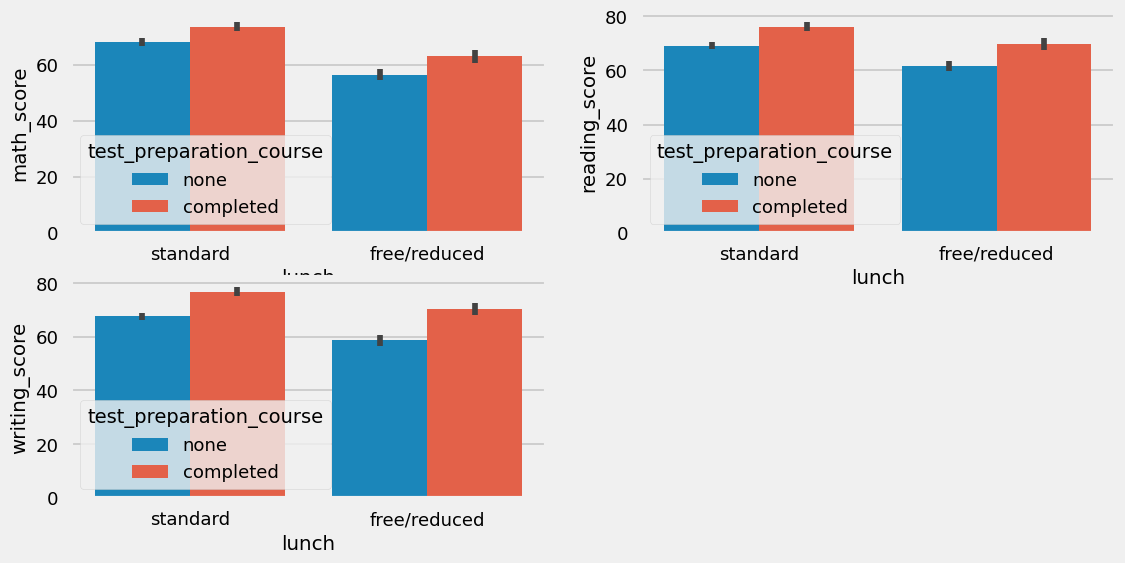

In [39]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# CHECKING OUTLIERS

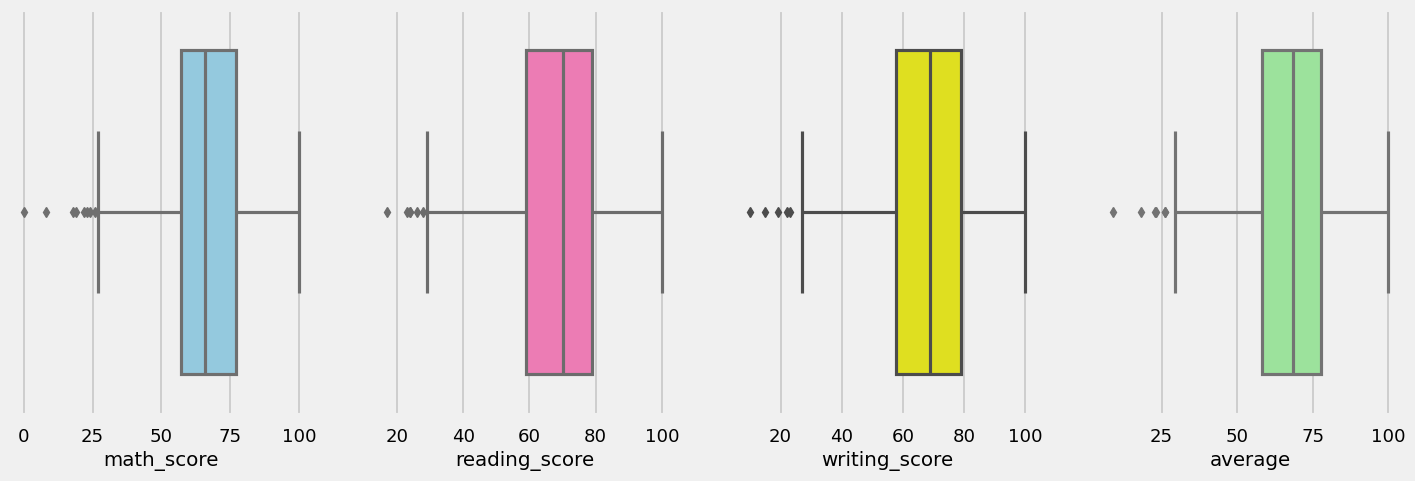

In [41]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

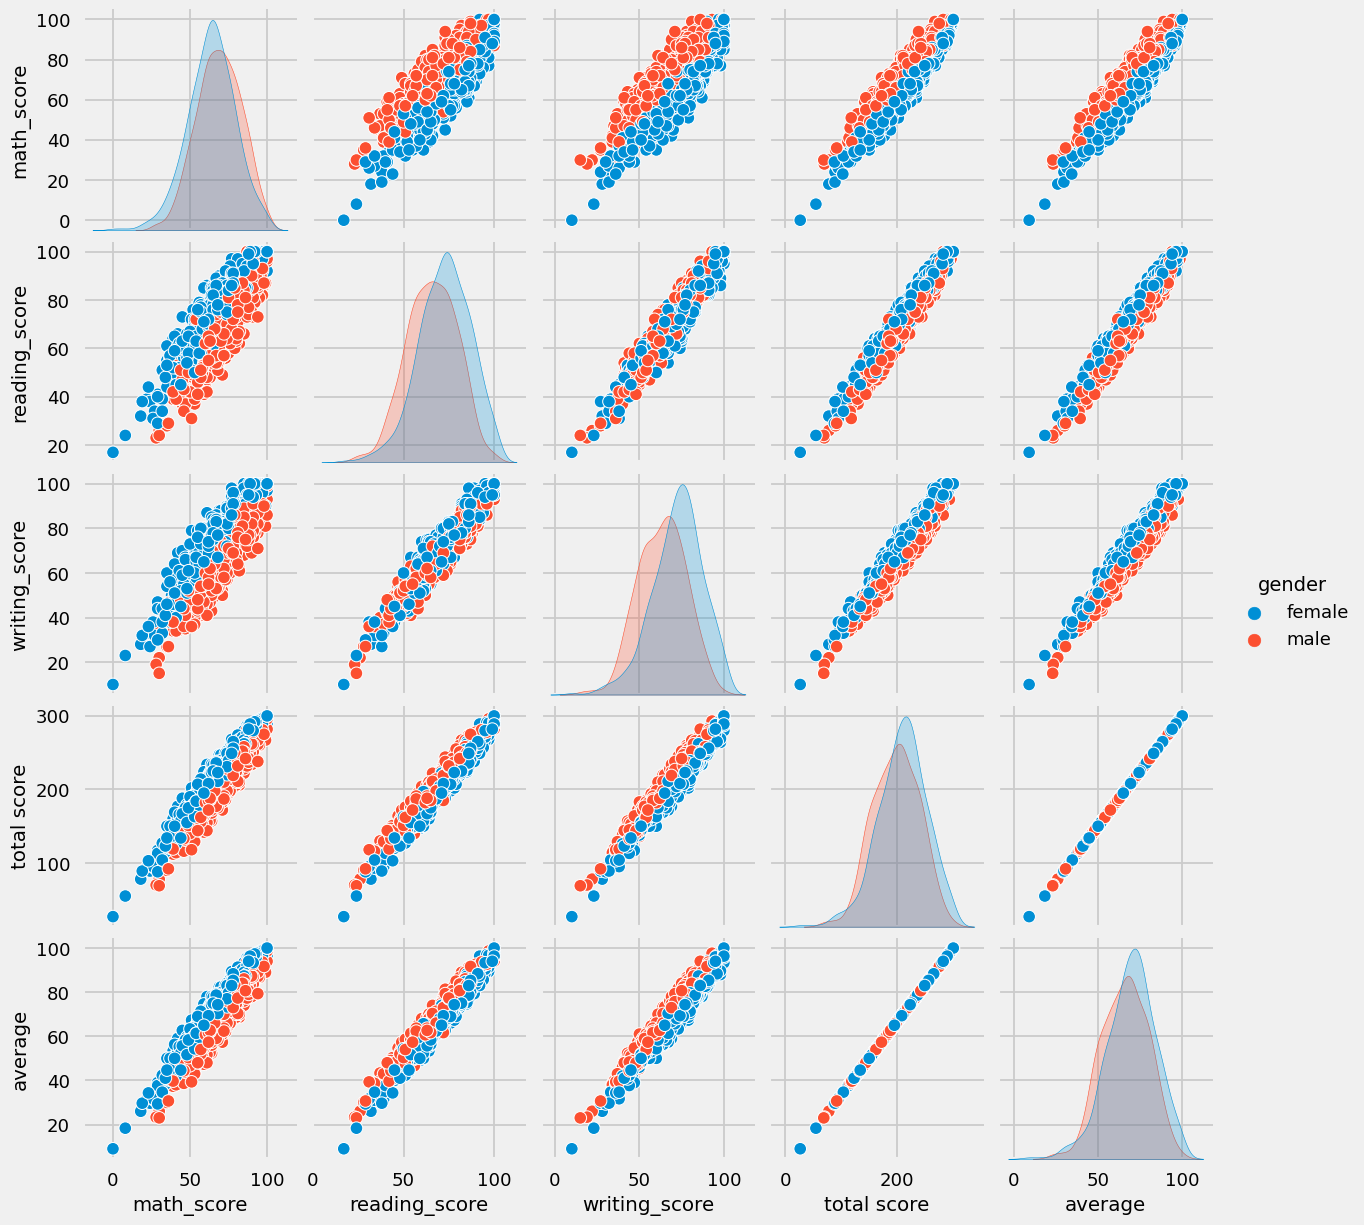

In [42]:
sns.pairplot(df,hue = 'gender')
plt.show()

# Conclusions
